Import Libraries

In [129]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from libraries import *
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor

Import Data

In [128]:
%%time
dataTrain = pd.read_csv('data/train/01_M01_DC_train.csv')
dataFault = pd.read_csv('data/train/train_faults/01_M01_train_fault_data.csv')

Wall time: 23.6 s


Exploratory Analysis

In [130]:
dataTrain.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
0,3283106,01M01,1,589,10511625,1,5.0,0.745235,1.085043,-1.151842,...,0.744638,0.727147,1.170894,-0.203892,-0.152495,0.0,-0.071733,-0.257798,0.862781,-0.200587
1,3283110,01M01,1,589,10511625,1,5.0,-0.037024,-0.932286,-1.152112,...,-1.312143,-1.405385,1.170894,-0.203892,-0.152495,0.0,-0.071733,-0.257798,0.862781,-0.200587
2,3283114,01M01,1,589,10511625,1,5.0,-0.507875,-1.106610,-1.151909,...,-1.312143,-1.405385,1.170894,-0.203892,-0.152495,0.0,-0.071733,-0.257798,0.862781,-0.200587
3,3283118,01M01,1,589,10511625,1,5.0,-0.793893,-1.128402,-1.151977,...,-1.312143,-1.405385,1.170894,-0.203892,-0.152495,0.0,-0.071733,-0.257798,0.862781,-0.200587
4,3283122,01M01,1,589,10511625,1,5.0,-0.977717,-1.128402,-1.151706,...,-1.312143,-1.405385,1.170894,-0.203892,-0.152495,0.0,-0.071733,-0.257798,0.862781,-0.200587


In [131]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124704 entries, 0 to 3124703
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   time                     int64  
 1   Tool                     object 
 2   stage                    int64  
 3   Lot                      int64  
 4   runnum                   int64  
 5   recipe                   int64  
 6   recipe_step              float64
 7   IONGAUGEPRESSURE         float64
 8   ETCHBEAMVOLTAGE          float64
 9   ETCHBEAMCURRENT          float64
 10  ETCHSUPPRESSORVOLTAGE    float64
 11  ETCHSUPPRESSORCURRENT    float64
 12  FLOWCOOLFLOWRATE         float64
 13  FLOWCOOLPRESSURE         float64
 14  ETCHGASCHANNEL1READBACK  float64
 15  ETCHPBNGASREADBACK       float64
 16  FIXTURETILTANGLE         float64
 17  ROTATIONSPEED            float64
 18  ACTUALROTATIONANGLE      float64
 19  FIXTURESHUTTERPOSITION   float64
 20  ETCHSOURCEUSAGE          float64
 21  ETCHAUXS

In [132]:
dataFault.head()

,time,fault_name,Tool
0,6533184,FlowCool Pressure Dropped Below Limit,01M01
1,8286500,FlowCool Pressure Dropped Below Limit,01M01
2,8627086,FlowCool Pressure Dropped Below Limit,01M01
3,8697340,FlowCool Pressure Dropped Below Limit,01M01
4,8971484,FlowCool Pressure Dropped Below Limit,01M01


In [133]:
dataFault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        19 non-null     int64 
 1   fault_name  19 non-null     object
 2   Tool        19 non-null     object
dtypes: int64(1), object(2)
memory usage: 584.0+ bytes


In [9]:
dataTrain.isnull().sum()

time                       0
Tool                       0
stage                      0
Lot                        0
runnum                     0
recipe                     0
recipe_step                1
IONGAUGEPRESSURE           0
ETCHBEAMVOLTAGE            0
ETCHBEAMCURRENT            0
ETCHSUPPRESSORVOLTAGE      0
ETCHSUPPRESSORCURRENT      0
FLOWCOOLFLOWRATE           0
FLOWCOOLPRESSURE           0
ETCHGASCHANNEL1READBACK    0
ETCHPBNGASREADBACK         0
FIXTURETILTANGLE           0
ROTATIONSPEED              0
ACTUALROTATIONANGLE        0
FIXTURESHUTTERPOSITION     6
ETCHSOURCEUSAGE            0
ETCHAUXSOURCETIMER         0
ETCHAUX2SOURCETIMER        0
ACTUALSTEPDURATION         0
dtype: int64

In [ ]:
#df = df.dropna()

In [134]:
dataTrain.describe().loc[["min","max","mean", "std"],:].round(2)

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
min,3283106.00,0.00,0.00,10511625.00,0.00,0.00,-1.36,-1.13,-1.15,-1.19,...,-1.36,-1.51,-1.05,-2.41,-17.14,0.00,-1.70,-1.64,-1.62,-0.85
max,43037336.00,137.00,9134.00,13062800.00,54.00,163.00,10.44,2.49,3.27,1.57,...,1.55,2.56,13.14,4.21,16.84,255.00,1.70,2.38,2.20,8.86
mean,22567740.84,17.56,2751.43,11747844.37,2.42,5.01,-0.01,-0.02,-0.03,-0.02,...,-0.02,-0.02,0.02,0.05,0.02,1.80,-0.09,0.17,0.01,0.03
std,10998133.79,22.99,2079.35,703901.99,3.23,13.52,1.03,1.00,1.00,1.00,...,1.01,1.01,1.00,1.03,1.00,17.82,0.90,1.07,1.05,1.13


Histograma de Datos en Variables Enteras

array([[<AxesSubplot:title={'center':'stage'}>,
        <AxesSubplot:title={'center':'Lot'}>],
       [<AxesSubplot:title={'center':'runnum'}>,
        <AxesSubplot:title={'center':'recipe'}>],
       [<AxesSubplot:title={'center':'recipe_step'}>, <AxesSubplot:>]],
      dtype=object)

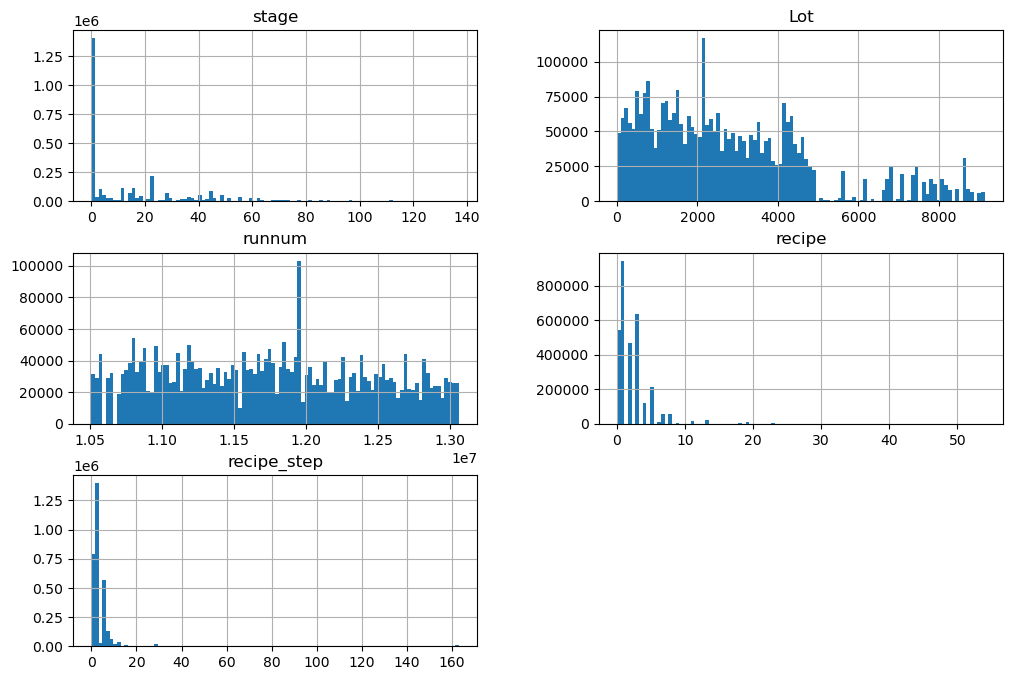

In [10]:
dataTrain[['stage', 'Lot', 'runnum', 'recipe', 'recipe_step']].hist(figsize=(12,8),bins=100)

Distribución de Datos en Variables Float vs Eventos de Falla

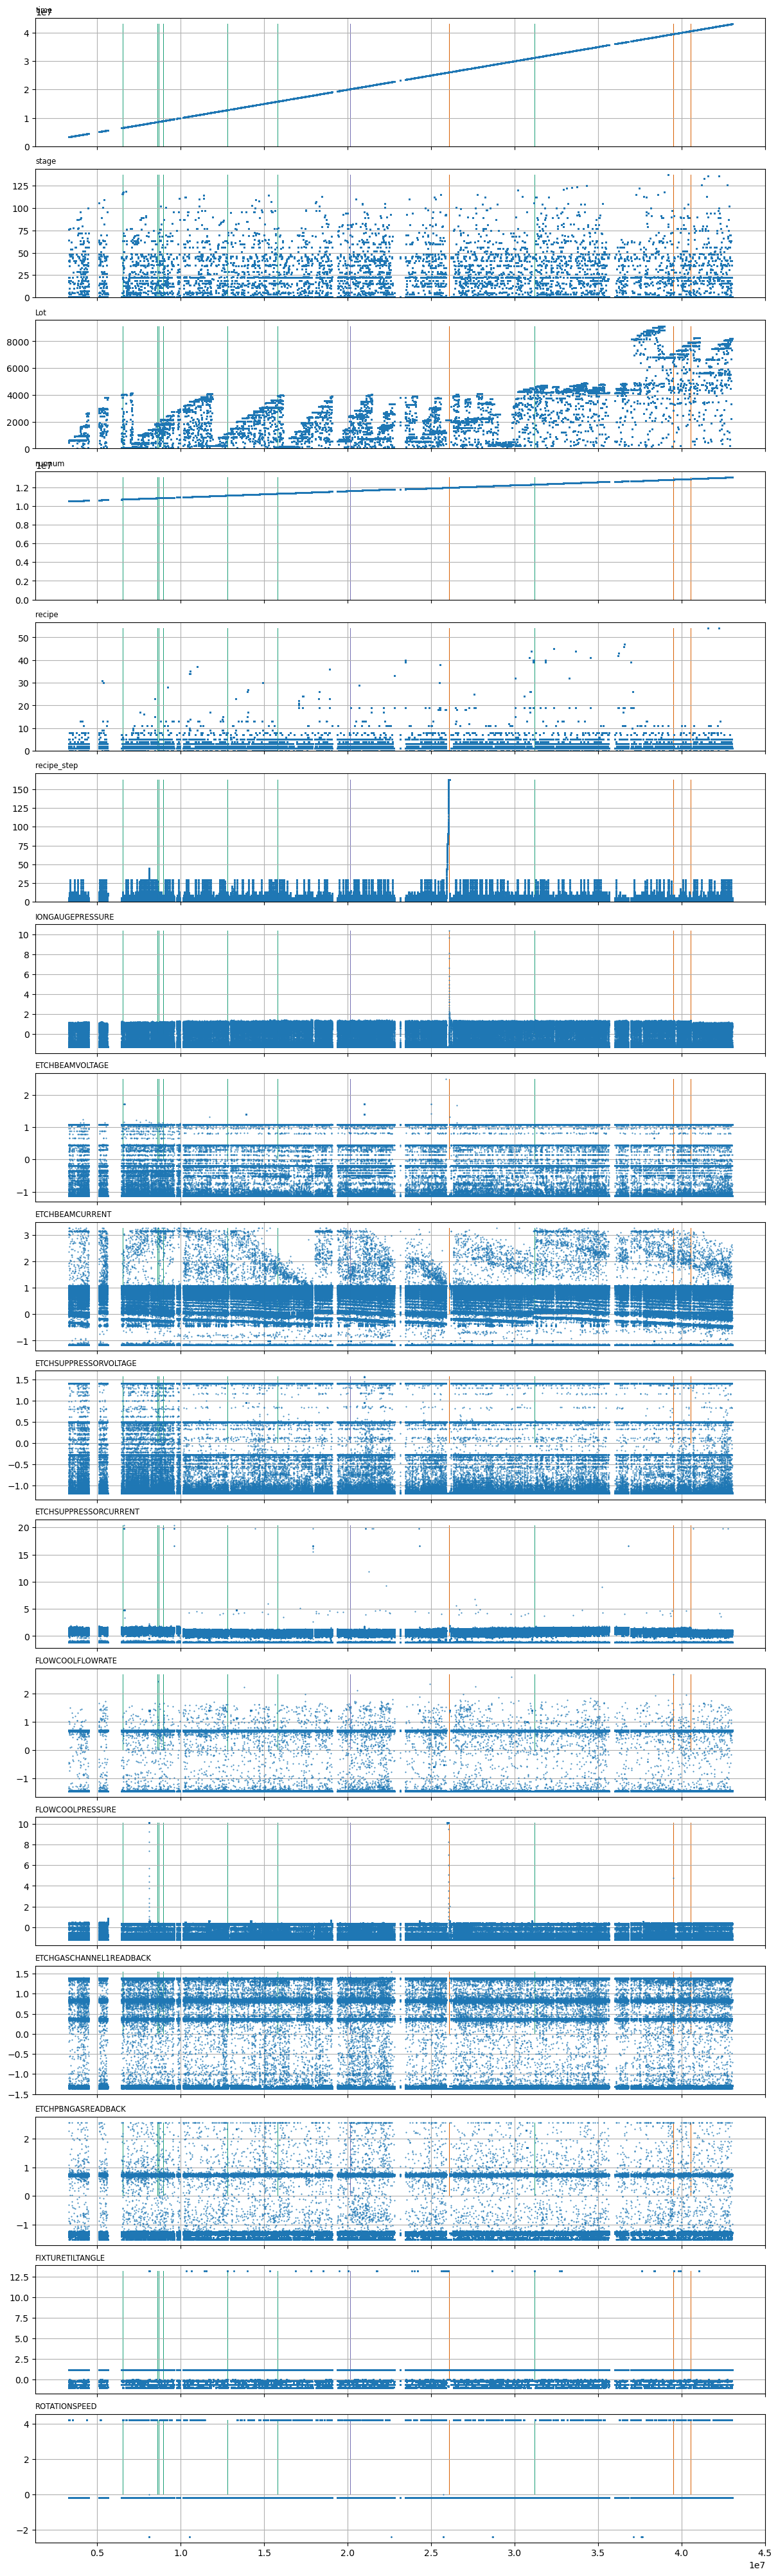

Wall time: 38.9 s


In [4]:
%%time
dataPlot = dataTrain.drop('Tool', axis=1)
faults = dataFault['fault_name'].unique()
fig, axs = plt.subplots(23, 1, figsize=(12, 40), constrained_layout=True, sharex=True)
for nn, ax in enumerate(axs.flat):
    column = dataPlot.columns[nn]
    line, = ax.plot('time', column, 'o', markersize=0.5, data=dataPlot, lw=2.5)
    ax.set_title(column, fontsize='small', loc='left')
    ax.grid()
    mx = np.max(dataPlot[column])
    for idx, x in enumerate(faults):
        ln = len(dataFault['fault_name'][dataFault['fault_name'] == x])
        values = pd.DataFrame(data = [mx for i in range(ln)])[0]
        ax.bar(dataFault['time'][dataFault['fault_name'] == x],
                values, 25000, color = plt.get_cmap("Dark2").colors[idx], label = x)
plt.show()

Tabla de Correlación de Variables

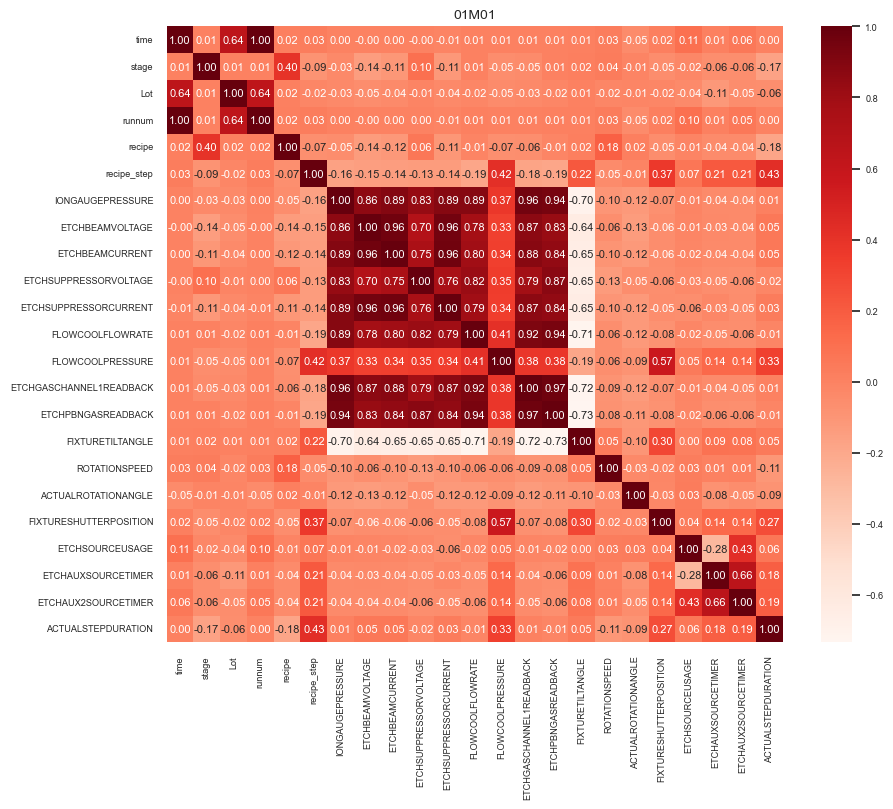

Wall time: 38min 31s


In [127]:
%%time
sns.set(font_scale=0.6)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(dataTrain.corr(),cmap=plt.cm.Reds,annot=True, square = True, fmt='.2f', annot_kws={'size': 8})
plt.title(dataTrain.iloc[1, 1], fontsize=10)
plt.show()

Pre-proccesing

In [3]:
data = dataTrain.copy()

In [12]:
dif = pd.DataFrame(data.time.diff(periods=1))
sorted(dif['time'].unique(), reverse=True)

[nan,
 794480.0,
 589532.0,
 348124.0,
 336070.0,
 318534.0,
 306768.0,
 176242.0,
 156364.0,
 123584.0,
 117102.0,
 110650.0,
 107336.0,
 98488.0,
 85948.0,
 79524.0,
 78480.0,
 77926.0,
 70526.0,
 65340.0,
 62424.0,
 60504.0,
 58378.0,
 55266.0,
 50924.0,
 50532.0,
 49432.0,
 48652.0,
 48164.0,
 47596.0,
 47276.0,
 46732.0,
 46444.0,
 44270.0,
 42332.0,
 41900.0,
 41828.0,
 41182.0,
 41132.0,
 40830.0,
 40804.0,
 40768.0,
 40516.0,
 39880.0,
 39356.0,
 38976.0,
 37934.0,
 37334.0,
 37282.0,
 37152.0,
 36986.0,
 36552.0,
 36276.0,
 36000.0,
 35624.0,
 35336.0,
 35296.0,
 35284.0,
 34432.0,
 34308.0,
 34208.0,
 33936.0,
 33888.0,
 33824.0,
 33808.0,
 33658.0,
 33408.0,
 33376.0,
 33184.0,
 33114.0,
 33064.0,
 32602.0,
 32540.0,
 32188.0,
 32080.0,
 32024.0,
 31804.0,
 31752.0,
 31648.0,
 31412.0,
 31320.0,
 31292.0,
 31196.0,
 30964.0,
 30836.0,
 30804.0,
 30756.0,
 30752.0,
 30624.0,
 30564.0,
 30444.0,
 30164.0,
 30128.0,
 30028.0,
 29948.0,
 29880.0,
 29856.0,
 29760.0,
 29408.0,
 2

In [4]:
%%time
# Completamos el dataset con los eventos de falla (fault-type y fault)
datasetTrain = faultData(dataTrain, dataFault)

In [5]:
# Encoding
le_target = LabelEncoder()
datasetTrain['Target'] = le_target.fit_transform(datasetTrain['Target'])
le_type = LabelEncoder()
datasetTrain['fault_type'] = le_type.fit_transform(datasetTrain['fault_type'])

In [15]:
datasetTrain.describe().round(2)

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,fault_type,Target
count,3124704.00,3124704.00,3124704.00,3124704.00,3124704.00,3124703.00,3124704.00,3124704.00,3124704.00,3124704.00,...,3124704.00,3124704.00,3124704.00,3124698.00,3124704.00,3124704.00,3124704.00,3124704.00,3124704.00,3124704.0
mean,22567740.84,17.56,2751.43,11747844.37,2.42,5.01,-0.01,-0.02,-0.03,-0.02,...,0.02,0.05,0.02,1.80,-0.09,0.17,0.01,0.03,3.00,1.0
std,10998133.79,22.99,2079.35,703901.99,3.23,13.52,1.03,1.00,1.00,1.00,...,1.00,1.03,1.00,17.82,0.90,1.07,1.05,1.13,0.01,0.0
min,3283106.00,0.00,0.00,10511625.00,0.00,0.00,-1.36,-1.13,-1.15,-1.19,...,-1.05,-2.41,-17.14,0.00,-1.70,-1.64,-1.62,-0.85,0.00,0.0
25%,13217125.00,1.00,1159.00,11151082.00,1.00,1.00,-1.34,-1.13,-1.15,-1.19,...,-0.67,-0.20,-0.15,0.00,-0.84,-0.72,-0.92,-0.59,3.00,1.0
50%,22060730.00,5.00,2296.00,11743895.00,2.00,3.00,0.56,-0.18,0.07,0.50,...,-0.41,-0.20,-0.15,1.00,-0.07,0.17,-0.11,-0.20,3.00,1.0
75%,31708019.00,28.00,3877.00,12330687.00,3.00,5.00,0.88,1.09,1.08,0.50,...,1.17,-0.20,-0.15,1.00,0.55,0.93,0.88,-0.03,3.00,1.0
max,43037336.00,137.00,9134.00,13062800.00,54.00,163.00,10.44,2.49,3.27,1.57,...,13.14,4.21,16.84,255.00,1.70,2.38,2.20,8.86,3.00,1.0


In [139]:
datasetTrain.corr()[['fault_type']].sort_values(by = 'fault_type', ascending = False)

,fault_type
fault_type,1.000000
Target,0.974176
FLOWCOOLFLOWRATE,0.001880
ETCHSUPPRESSORVOLTAGE,0.001855
ETCHPBNGASREADBACK,0.001692
ETCHSUPPRESSORCURRENT,0.001618
ETCHGASCHANNEL1READBACK,0.001523
ETCHBEAMCURRENT,0.001455
IONGAUGEPRESSURE,0.001426
ETCHBEAMVOLTAGE,0.001361


In [17]:
datasetTrain.corr()[['Target']].sort_values(by = 'Target', ascending = False)

,Target
Target,1.000000
fault_type,0.974176
FLOWCOOLFLOWRATE,0.002114
ETCHSUPPRESSORVOLTAGE,0.002015
ETCHPBNGASREADBACK,0.001927
ETCHSUPPRESSORCURRENT,0.001791
ETCHGASCHANNEL1READBACK,0.001769
IONGAUGEPRESSURE,0.001680
ETCHBEAMCURRENT,0.001648
ETCHBEAMVOLTAGE,0.001559


Proceso de completar la serie de tiempo faltante

In [64]:
data = dataTrain.copy()

In [65]:
%%time
# Generamos los datos de tiempo faltantes
dataSeq = timeSeq(data, 20000)

Wall time: 13min 7s


In [66]:
# Dataset base para preprocesamiento
dataSeq.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,filled
0,3283106,01M01,1.0,589.0,10511625.0,1.0,5.0,0.745235,1.085043,-1.151842,...,0.727147,1.170894,-0.203892,-0.152495,0.0,-0.071733,-0.257798,0.862781,-0.200587,0
1,3283110,01M01,1.0,589.0,10511625.0,1.0,5.0,-0.037024,-0.932286,-1.152112,...,-1.405385,1.170894,-0.203892,-0.152495,0.0,-0.071733,-0.257798,0.862781,-0.200587,0
2,3283114,01M01,1.0,589.0,10511625.0,1.0,5.0,-0.507875,-1.106610,-1.151909,...,-1.405385,1.170894,-0.203892,-0.152495,0.0,-0.071733,-0.257798,0.862781,-0.200587,0
3,3283118,01M01,1.0,589.0,10511625.0,1.0,5.0,-0.793893,-1.128402,-1.151977,...,-1.405385,1.170894,-0.203892,-0.152495,0.0,-0.071733,-0.257798,0.862781,-0.200587,0
4,3283122,01M01,1.0,589.0,10511625.0,1.0,5.0,-0.977717,-1.128402,-1.151706,...,-1.405385,1.170894,-0.203892,-0.152495,0.0,-0.071733,-0.257798,0.862781,-0.200587,0


In [73]:
dataSeq.shape

(5705375, 24)

In [69]:
dataSeq.describe().round(2)

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,filled
count,5705375.00,3124704.00,3124704.00,3124704.00,3124704.00,3124703.00,3124704.00,3124704.00,3124704.00,3124704.00,...,3124704.00,3124704.00,3124704.00,3124704.00,3124698.00,3124704.00,3124704.00,3124704.00,3124704.00,5705375.00
mean,22697740.99,17.56,2751.43,11747844.37,2.42,5.01,-0.01,-0.02,-0.03,-0.02,...,-0.02,0.02,0.05,0.02,1.80,-0.09,0.17,0.01,0.03,0.45
std,11404602.62,22.99,2079.35,703901.99,3.23,13.52,1.03,1.00,1.00,1.00,...,1.01,1.00,1.03,1.00,17.82,0.90,1.07,1.05,1.13,0.50
min,3283106.00,0.00,0.00,10511625.00,0.00,0.00,-1.36,-1.13,-1.15,-1.19,...,-1.51,-1.05,-2.41,-17.14,0.00,-1.70,-1.64,-1.62,-0.85,0.00
25%,12769108.00,1.00,1159.00,11151082.00,1.00,1.00,-1.34,-1.13,-1.15,-1.19,...,-1.29,-0.67,-0.20,-0.15,0.00,-0.84,-0.72,-0.92,-0.59,0.00
50%,22965282.00,5.00,2296.00,11743895.00,2.00,3.00,0.56,-0.18,0.07,0.50,...,0.73,-0.41,-0.20,-0.15,1.00,-0.07,0.17,-0.11,-0.20,0.00
75%,32595228.00,28.00,3877.00,12330687.00,3.00,5.00,0.88,1.09,1.08,0.50,...,0.74,1.17,-0.20,-0.15,1.00,0.55,0.93,0.88,-0.03,1.00
max,43037336.00,137.00,9134.00,13062800.00,54.00,163.00,10.44,2.49,3.27,1.57,...,2.56,13.14,4.21,16.84,255.00,1.70,2.38,2.20,8.86,1.00


In [72]:
dataSeq.drop('filled', axis=1, inplace=True)

In [74]:
dataSeq.corr()

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
time,1.000000,0.005681,0.643404,0.999854,0.020380,0.030191,0.003170,-0.001796,0.001354,-0.000085,...,0.005805,0.010486,0.013530,0.031233,-0.049483,0.019696,0.105875,0.012131,0.055069,0.004734
stage,0.005681,1.000000,0.010542,0.006616,0.402460,-0.086140,-0.031080,-0.138566,-0.109031,0.102440,...,-0.047913,0.006797,0.024126,0.037704,-0.006327,-0.051947,-0.024455,-0.063049,-0.063003,-0.166447
Lot,0.643404,0.010542,1.000000,0.640217,0.015310,-0.022625,-0.033357,-0.050772,-0.039451,-0.006196,...,-0.029712,-0.021438,0.006186,-0.022750,-0.011186,-0.021423,-0.042805,-0.113350,-0.051257,-0.061621
runnum,0.999854,0.006616,0.640217,1.000000,0.020964,0.027635,0.004312,-0.000737,0.002317,0.000825,...,0.006783,0.011665,0.012327,0.032029,-0.049404,0.018454,0.104637,0.011670,0.052791,0.002685
recipe,0.020380,0.402460,0.015310,0.020964,1.000000,-0.067283,-0.051966,-0.135414,-0.115568,0.060232,...,-0.058572,-0.010640,0.018123,0.177967,0.023357,-0.050490,-0.006242,-0.043809,-0.043809,-0.180036
recipe_step,0.030191,-0.086140,-0.022625,0.027635,-0.067283,1.000000,-0.161126,-0.145576,-0.139748,-0.131460,...,-0.175789,-0.186074,0.215919,-0.046632,-0.006059,0.368187,0.066734,0.213362,0.212331,0.429536
IONGAUGEPRESSURE,0.003170,-0.031080,-0.033357,0.004312,-0.051966,-0.161126,1.000000,0.863436,0.892712,0.833280,...,0.959177,0.942281,-0.704978,-0.103767,-0.118874,-0.070405,-0.008474,-0.040380,-0.041016,0.011619
ETCHBEAMVOLTAGE,-0.001796,-0.138566,-0.050772,-0.000737,-0.135414,-0.145576,0.863436,1.000000,0.964990,0.696321,...,0.867694,0.828257,-0.637808,-0.061588,-0.133713,-0.056621,-0.013544,-0.034562,-0.038657,0.053013
ETCHBEAMCURRENT,0.001354,-0.109031,-0.039451,0.002317,-0.115568,-0.139748,0.892712,0.964990,1.000000,0.746928,...,0.879047,0.844446,-0.651951,-0.096583,-0.122264,-0.055624,-0.016405,-0.037598,-0.039919,0.052137
ETCHSUPPRESSORVOLTAGE,-0.000085,0.102440,-0.006196,0.000825,0.060232,-0.131460,0.833280,0.696321,0.746928,1.000000,...,0.786384,0.871478,-0.654133,-0.126870,-0.054974,-0.058696,-0.030298,-0.052521,-0.062248,-0.020280


In [75]:
# Se detalla la cantidad de datos a completar 
dataSeq.isnull().sum()

time                             0
Tool                       2580671
stage                      2580671
Lot                        2580671
runnum                     2580671
recipe                     2580671
recipe_step                2580672
IONGAUGEPRESSURE           2580671
ETCHBEAMVOLTAGE            2580671
ETCHBEAMCURRENT            2580671
ETCHSUPPRESSORVOLTAGE      2580671
ETCHSUPPRESSORCURRENT      2580671
FLOWCOOLFLOWRATE           2580671
FLOWCOOLPRESSURE           2580671
ETCHGASCHANNEL1READBACK    2580671
ETCHPBNGASREADBACK         2580671
FIXTURETILTANGLE           2580671
ROTATIONSPEED              2580671
ACTUALROTATIONANGLE        2580671
FIXTURESHUTTERPOSITION     2580677
ETCHSOURCEUSAGE            2580671
ETCHAUXSOURCETIMER         2580671
ETCHAUX2SOURCETIMER        2580671
ACTUALSTEPDURATION         2580671
dtype: int64

In [76]:
%%time
# Completamos la secuencia de datos faltante
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dataFilled = pd.DataFrame(imp.fit_transform(dataSeq), columns= dataSeq.columns)

Wall time: 2min 4s


In [90]:
dataFilled[['time','stage', 'Lot', 'runnum', 'recipe', 'recipe_step']] = dataFilled[['time','stage', 'Lot', 'runnum', 'recipe', 'recipe_step']].astype(int, )
dataFilled[['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION']] = dataFilled[['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION']].astype(float)

In [98]:
%%time
# Incluir datos de falla
datasetFilled = faultData(dataFilled, dataFault)

In [101]:
# Encoding
le_target = LabelEncoder()
datasetFilled['Target'] = le_target.fit_transform(datasetFilled['Target'])
le_type = LabelEncoder()
datasetFilled['fault_type'] = le_type.fit_transform(datasetFilled['fault_type'])

In [105]:
datasetFilled.corr()[['Target']].sort_values(by = 'Target', ascending = False)

,Target
Target,1.000000
fault_type,0.976458
ETCHPBNGASREADBACK,0.001469
runnum,0.000741
ETCHSUPPRESSORVOLTAGE,0.000716
ETCHSUPPRESSORCURRENT,0.000586
FLOWCOOLFLOWRATE,0.000580
ETCHBEAMCURRENT,0.000477
ETCHBEAMVOLTAGE,0.000424
ETCHGASCHANNEL1READBACK,0.000410


In [109]:
datasetFilled.corr()[['fault_type']].sort_values(by = 'fault_type', ascending = False)

,fault_type
fault_type,1.000000
Target,0.976458
ETCHPBNGASREADBACK,0.001311
runnum,0.000834
ETCHSUPPRESSORVOLTAGE,0.000628
ETCHSUPPRESSORCURRENT,0.000488
FLOWCOOLFLOWRATE,0.000458
ETCHAUX2SOURCETIMER,0.000424
ETCHAUXSOURCETIMER,0.000392
ETCHBEAMCURRENT,0.000366


In [140]:
datasetFilled.head()

NameError: name 'datasetFilled' is not defined

In [112]:
features = ['time','stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION']

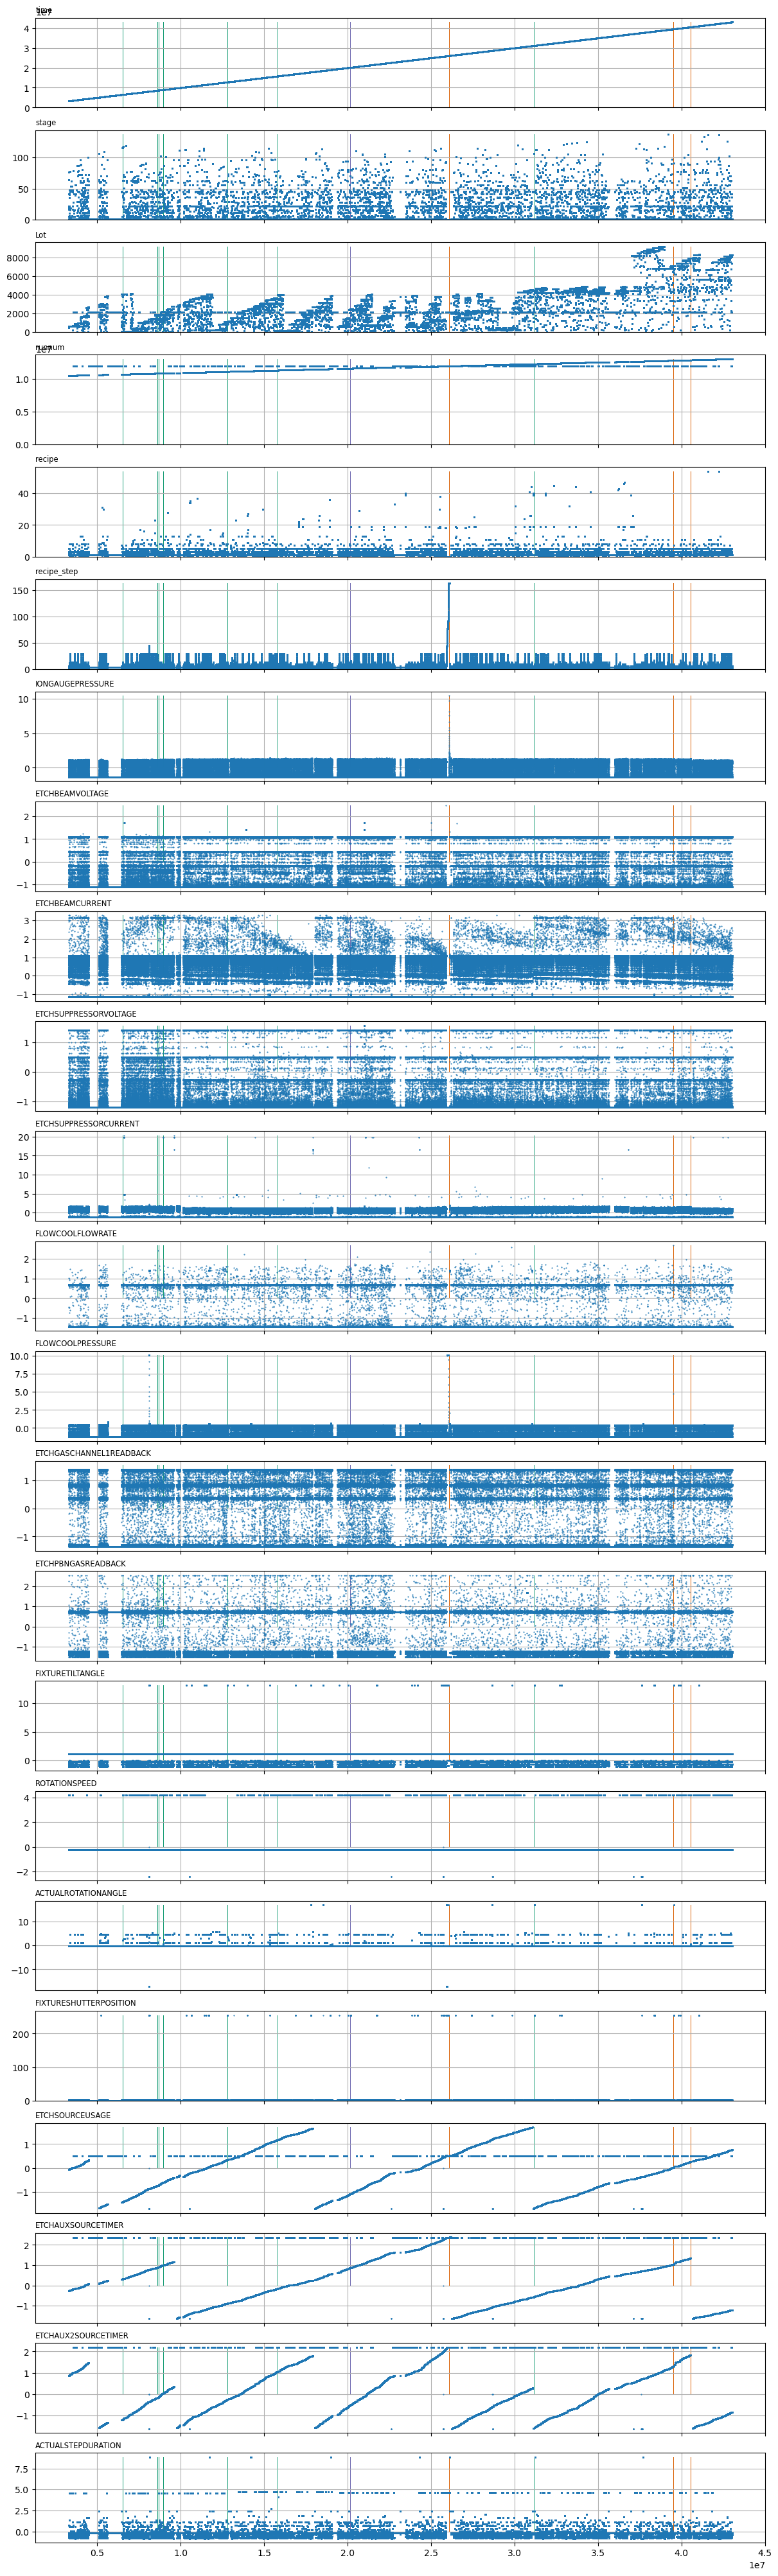

Wall time: 1min 39s


In [113]:
%%time
dataPlot = dataFilled[features]
faults = dataFault['fault_name'].unique()
fig, axs = plt.subplots(23, 1, figsize=(12, 40), constrained_layout=True, sharex=True)
for nn, ax in enumerate(axs.flat):
    column = dataPlot.columns[nn]
    line, = ax.plot('time', column, 'o', markersize=0.5, data=dataPlot, lw=2.5)
    ax.set_title(column, fontsize='small', loc='left')
    ax.grid()
    mx = np.max(dataPlot[column])
    for idx, x in enumerate(faults):
        ln = len(dataFault['fault_name'][dataFault['fault_name'] == x])
        values = pd.DataFrame(data = [mx for i in range(ln)])[0]
        ax.bar(dataFault['time'][dataFault['fault_name'] == x],
                values, 25000, color = plt.get_cmap("Dark2").colors[idx], label = x)
plt.show()

In [121]:
datasetTrain.shape

(3124704, 26)

In [123]:
datasetFilled.shape

(5705375, 26)

In [6]:
data = datasetTrain.copy()

Tratamiento de Datos

In [7]:
features = ['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT','ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 
            'FLOWCOOLFLOWRATE','FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK']

In [8]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

In [9]:
for i in data['Target'].unique():
    print(i, le_target.inverse_transform([i]))

1 ['No Fault']
0 ['Fault']


In [10]:
for i in data['fault_type'].unique():
    print(i, le_type.inverse_transform([i]))

3 ['No Fault']
0 ['FlowCool Pressure Dropped Below Limit']
1 ['Flowcool Pressure Too High Check Flowcool Pump']
2 ['Flowcool leak']


In [129]:
# Normalized Features
X[:10]

array([[ 0.73418764,  1.10827887, -1.12306443,  0.51312876, -1.06411459,
        -1.39925325, -0.20260637,  0.76339091,  0.7422683 ],
       [-0.02878571, -0.90921622, -1.12333427, -0.90515865, -1.12204381,
        -1.39925325, -0.48198851, -1.2795539 , -1.36960988],
       [-0.48802862, -1.0835547 , -1.12313189, -1.10071073, -1.12204381,
        -1.39925325, -0.56007704, -1.2795539 , -1.36960988],
       [-0.76699527, -1.10534871, -1.12319935, -1.15042423, -1.12204381,
        -1.39925325, -0.59721131, -1.2795539 , -1.36960988],
       [-0.94628734, -1.10534871, -1.12292951, -1.15993965, -1.12204381,
        -1.39925325, -0.64406443, -1.2795539 , -1.36960988],
       [-1.03203492, -1.10534871, -1.12326681, -1.16212433, -1.12204381,
        -1.39925325, -0.66176442, -1.2795539 , -1.36960988],
       [-1.096942  , -1.10534871, -1.12306443, -1.16333804, -1.12204381,
        -1.39925325, -0.67668841, -1.2795539 , -1.36960988],
       [-1.14153583, -1.10534871, -1.12340173, -1.16358078, -1

In [130]:
# Encoded Classes
data[['Target', 'fault_type']]

,Target,fault_type
0,1,3
1,1,3
2,1,3
3,1,3
4,1,3
...,...,...
3124699,1,3
3124700,1,3
3124701,1,3
3124702,1,3


Fault Detection

In [11]:
# Train/Test
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:(len(X)+1)]
y_train, y_test = data['Target'][0:train_size], data['Target'][train_size:(len(X)+1)]
print(len(X_train), len(X_test))

2187292 937412


In [134]:
%%time
# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

Wall time: 5min 53s


In [135]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0      5]
 [     1 937407]]


In [136]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0      5]
 [     1 937407]]


In [44]:
data['Target']

0          1
1          1
2          1
3          1
4          1
          ..
3124699    1
3124700    1
3124701    1
3124702    1
3124703    1
Name: Target, Length: 3124704, dtype: int32

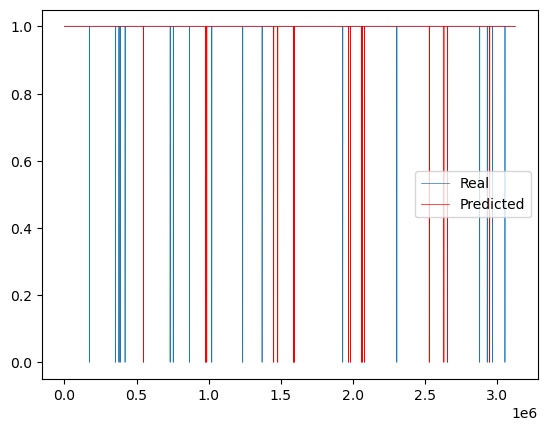

In [45]:
plt.plot(data['Target'], label = 'Real', lw = 0.5)
plt.plot(pred, color = 'r',  label = 'Predicted', lw = 0.5)
plt.legend()

In [36]:
ctm = data['Target'][data['Target'] == 0].shape[0] / X.shape[0] 

In [38]:
clf = LocalOutlierFactor(n_neighbors=35, contamination = ctm)

In [39]:
%%time
pred = clf.fit_predict(X)

Wall time: 37min 52s


In [40]:
pred = [0 if i==-1 else 1 for i in pred]

In [42]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0      17]
 [      1 3124687]]


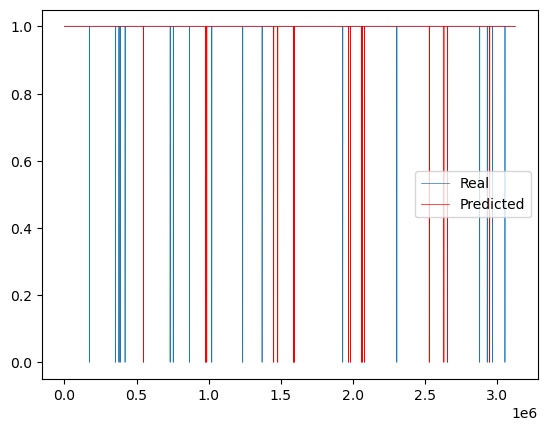

In [46]:
plt.plot(data['Target'], label = 'Real', lw = 0.5)
plt.plot(pred, color = 'r',  label = 'Predicted', lw = 0.5)
plt.legend()

In [47]:
from sklearn.ensemble import IsolationForest

In [54]:
model_IF = IsolationForest( n_estimators=1000, max_samples='auto',contamination=ctm,random_state=42)

In [56]:
%%time
model_IF.fit(X)

Wall time: 22min 49s


IsolationForest(contamination=5.440515325611642e-06, n_estimators=1000,
                random_state=42)

In [57]:
%%time
pred = model_IF.predict(X)

Wall time: 18min 51s


In [58]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [59]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      1 3124704]]


In [60]:
anomaly_scores = model_IF.decision_function(X)

In [61]:
anomaly_scores

array([0.06008656, 0.0680959 , 0.12097868, ..., 0.28222648, 0.28077515,
       0.28478831])

In [63]:
%%time
score_anomalia = model_IF.score_samples(X)

Wall time: 20min 34s


In [66]:
cuantil_01 = np.quantile(score_anomalia, q=0.01)
cuantil_01

-0.6621133526007142

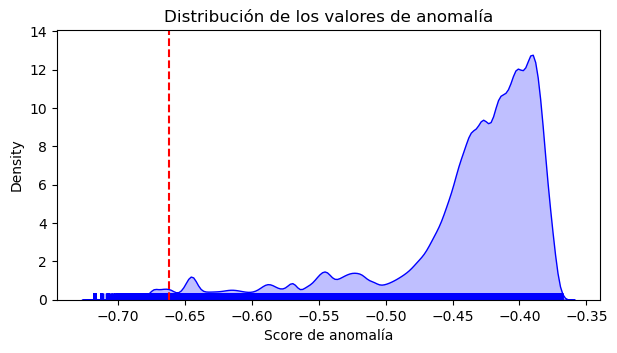

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.distplot(
    score_anomalia,
    hist    = False,
    rug     = True,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)

ax.axvline(cuantil_01, c='red', linestyle='--', label='cuantil 0.01')
ax.set_title('Distribución de los valores de anomalía')
ax.set_xlabel('Score de anomalía');

In [70]:
score_anomalia

array([-0.65745657, -0.64944722, -0.59656444, ..., -0.43531665,
       -0.43676798, -0.43275482])

In [71]:
data['Target']

0          1
1          1
2          1
3          1
4          1
          ..
3124699    1
3124700    1
3124701    1
3124702    1
3124703    1
Name: Target, Length: 3124704, dtype: int32

In [72]:
df_resultados = pd.DataFrame({
                    'score'    : score_anomalia,
                    'anomalia' : data['Target']
                })

In [73]:
# Matriz de confusión de la clasificación final
# ==============================================================================
df_resultados = df_resultados \
                .sort_values('score', ascending=True) \
                .reset_index(drop=True)

df_resultados['clasificacion'] = np.where(df_resultados.index <= 17, 1, 0)

pd.crosstab(
    df_resultados.anomalia,
    df_resultados.clasificacion
)

clasificacion,0,1
anomalia,,
0,17,0
1,3124669,18


In [78]:
df_resultados.tail(20)

,score,anomalia,clasificacion
3124684,-0.368691,1,0
3124685,-0.368691,1,0
3124686,-0.368656,1,0
3124687,-0.368650,1,0
3124688,-0.368629,1,0
3124689,-0.368615,1,0
3124690,-0.368595,1,0
3124691,-0.368576,1,0
3124692,-0.368556,1,0
3124693,-0.368547,1,0


In [76]:
score_anomalia

array([-0.65745657, -0.64944722, -0.59656444, ..., -0.43531665,
       -0.43676798, -0.43275482])

In [75]:
np.where(score_anomalia == -0.368136)

(array([], dtype=int64),)

In [80]:
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

Wall time: 15.7 s


In [81]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [82]:
principalDf.head()

,principal component 1,principal component 2
0,0.070907,-0.210755
1,-2.912749,-0.049505
2,-3.213671,-0.079339
3,-3.343654,-0.098848
4,-3.418775,-0.135564


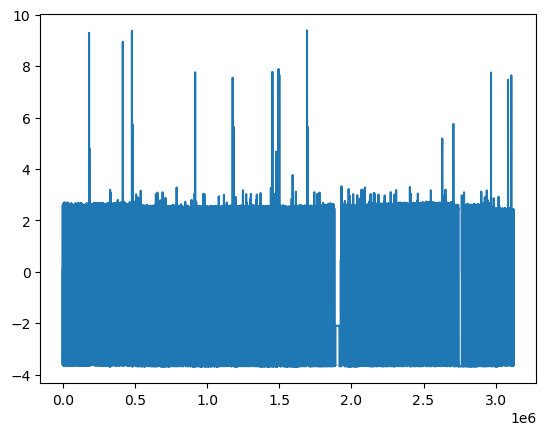

In [84]:
plt.plot(principalDf['principal component 1'])

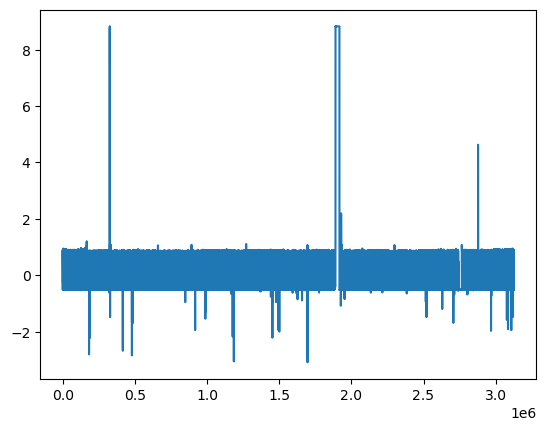

In [85]:
plt.plot(principalDf['principal component 2'])

In [86]:
pca.explained_variance_ratio_

array([0.80186705, 0.09385169])

In [87]:
# Train/Test
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:(len(X)+1)]
y_train, y_test = data['Target'][0:train_size], data['Target'][train_size:(len(X)+1)]
print(len(X_train), len(X_test))

2187292 937412


In [88]:
%%time
# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

Wall time: 7min 25s


In [89]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0      5]
 [     1 937407]]


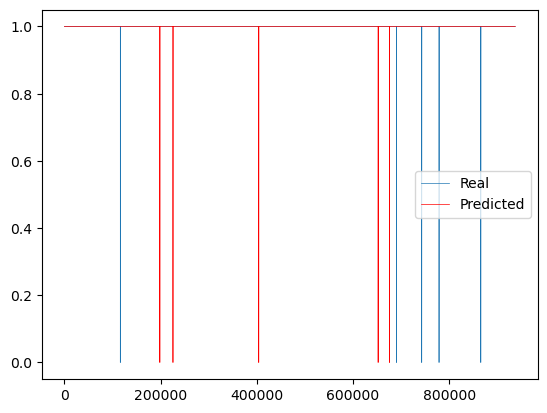

In [90]:
plt.plot(y_test.to_numpy(), label = 'Real', lw = 0.5)
plt.plot(pred, color = 'r',  label = 'Predicted', lw = 0.5)
plt.legend()

In [110]:
# Train/Test
X = principalDf
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:(len(X)+1)]
y_train, y_test = data['Target'][0:train_size], data['Target'][train_size:(len(X)+1)]
print(len(X_train), len(X_test))

2187292 937412


In [104]:
from sklearn.svm import OneClassSVM

In [117]:
%%time
model = OneClassSVM(nu=ctm, kernel = 'rbf', gamma = 'auto')
model.fit(X_train)

Wall time: 36.5 s


OneClassSVM(gamma='auto', nu=5.440515325611642e-06)

In [122]:
%%time
pred = model.predict(X)

Wall time: 18.1 s


In [123]:
pred = [0 if i==-1 else 1 for i in pred]

In [124]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0     177]
 [      1 3124527]]


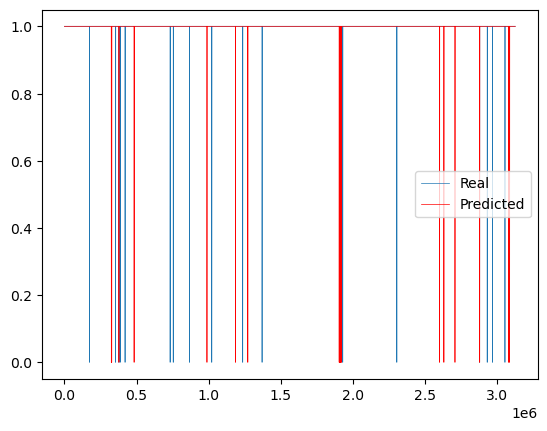

In [126]:
plt.plot(data['Target'], label = 'Real', lw = 0.5)
plt.plot(pred, color = 'r',  label = 'Predicted', lw = 0.5)
plt.legend()

Predicción con Datos Originales + Secuencia Completa

In [141]:
%%time
# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

Wall time: 11h 35min 37s


In [142]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0       7]
 [      1 1711606]]


In [143]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0       3]
 [      1 1711610]]


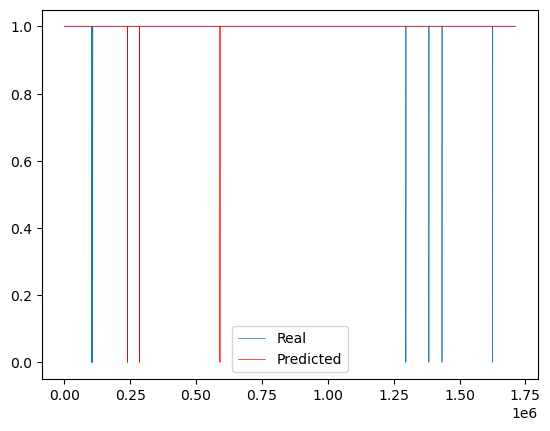

In [144]:
plt.plot(y_test.to_numpy(), label = 'Real', lw = 0.5)
plt.plot(pred, color = 'r',  label = 'Predicted', lw = 0.5)
plt.legend()